# Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Data

In [2]:
df = pd.read_csv("chicago_crime_data_incremental.csv")
df

,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
0,13140855,JG341458,2023-01-01T00:00:00.000,082XX S JEFFERY BLVD,1754,OFFENSE INVOLVING CHILDREN,AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M...,APARTMENT,False,True,...,8.0,46.0,02,1190953.0,1850848.0,2023,2023-09-24T15:41:26.000,41.745739,-87.575883,"{'latitude': '41.745738706', 'longitude': '-87..."
1,12938772,JG100243,2023-01-01T00:00:00.000,073XX S ABERDEEN ST,0266,CRIMINAL SEXUAL ASSAULT,PREDATORY,RESIDENCE,True,False,...,17.0,68.0,02,1170254.0,1856107.0,2023,2024-02-09T15:40:56.000,41.760645,-87.651575,"{'latitude': '41.760645062', 'longitude': '-87..."
2,13347280,JH126993,2023-01-01T00:00:00.000,007XX N LARRABEE ST,1140,DECEPTIVE PRACTICE,EMBEZZLEMENT,OTHER (SPECIFY),False,False,...,42.0,8.0,12,NaN,NaN,2023,2024-01-25T15:42:27.000,NaN,NaN,NaN
3,13434255,JH231395,2023-01-01T00:00:00.000,114XX S CARPENTER ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,21.0,75.0,11,NaN,NaN,2023,2024-04-20T15:41:25.000,NaN,NaN,NaN
4,13060487,JG245349,2023-01-01T00:00:00.000,021XX S MARSHALL BLVD,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,True,...,25.0,30.0,17,1157030.0,1889735.0,2023,2024-01-26T15:40:42.000,41.853202,-87.699132,"{'latitude': '41.853202129', 'longitude': '-87..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650583,13910176,JJ345463,2025-07-23T00:00:00.000,067XX N ASHLAND AVE,0710,THEFT,THEFT FROM MOTOR VEHICLE,STREET,False,False,...,49.0,1.0,06,1164383.0,1945033.0,2025,2025-07-30T15:43:39.000,42.004791,-87.670575,"{'latitude': '42.004790901', 'longitude': '-87..."
650584,13913686,JJ349653,2025-07-23T00:00:00.000,051XX S DR MARTIN LUTHER KING JR DR,1150,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,APARTMENT,False,False,...,3.0,40.0,11,1179800.0,1870899.0,2025,2025-07-30T15:43:39.000,41.801023,-87.616136,"{'latitude': '41.801022829', 'longitude': '-87..."
650585,13910135,JJ345509,2025-07-23T00:00:00.000,060XX S WABASH AVE,0920,MOTOR VEHICLE THEFT,ATTEMPT - AUTOMOBILE,VEHICLE NON-COMMERCIAL,False,False,...,20.0,40.0,07,1177748.0,1865080.0,2025,2025-07-30T15:43:39.000,41.785102,-87.623838,"{'latitude': '41.785101667', 'longitude': '-87..."
650586,13915274,JJ345083,2025-07-23T00:00:00.000,104XX S AVENUE F,4387,OTHER OFFENSE,VIOLATE ORDER OF PROTECTION,RESIDENCE,False,True,...,10.0,52.0,26,1203487.0,1836350.0,2025,2025-07-30T15:43:39.000,41.705643,-87.530452,"{'latitude': '41.70564324', 'longitude': '-87...."


# Changing Data Types

In [3]:
df.dtypes

id                        int64
case_number              object
date                     object
block                    object
iucr                     object
primary_type             object
description              object
location_description     object
arrest                     bool
domestic                   bool
beat                      int64
district                  int64
ward                    float64
community_area          float64
fbi_code                 object
x_coordinate            float64
y_coordinate            float64
year                      int64
updated_on               object
latitude                float64
longitude               float64
location                 object
dtype: object

In [4]:
# Convert to datetime
df['date'] = pd.to_datetime(df['date'])
df['updated_on'] = pd.to_datetime(df['updated_on'])
# Convert float to nullable Int where applicable
df['community_area'] = df['community_area'].astype('Int64')
df['ward'] = df['ward'].astype('Int64')
df['x_coordinate'] = df['x_coordinate'].astype('Int64')
df['y_coordinate'] = df['y_coordinate'].astype('Int64')
# Convert to float32
df['latitude'] = df['latitude'].astype('float32')
df['longitude'] = df['longitude'].astype('float32')
# Optional: convert string columns to category
categorical_cols = ['iucr', 'primary_type', 'description', 'location_description', 'fbi_code']
for col in categorical_cols:
    df[col] = df[col].astype('category')

In [5]:
df.dtypes

id                               int64
case_number                     object
date                    datetime64[ns]
block                           object
iucr                          category
primary_type                  category
description                   category
location_description          category
arrest                            bool
domestic                          bool
beat                             int64
district                         int64
ward                             Int64
community_area                   Int64
fbi_code                      category
x_coordinate                     Int64
y_coordinate                     Int64
year                             int64
updated_on              datetime64[ns]
latitude                       float32
longitude                      float32
location                        object
dtype: object

# EDA

In [6]:
df.describe()

,id,beat,district,ward,community_area,x_coordinate,y_coordinate,year,latitude,longitude
count,6.505880e+05,650588.000000,650588.000000,650585.000000,650571.000000,6.476170e+05,6.476170e+05,650588.000000,647617.000000,647617.000000
mean,1.339489e+07,1154.216733,11.312460,23.150063,36.283526,1.165363e+06,1.887453e+06,2023.795022,41.965401,-87.943161
std,6.903053e+05,710.048489,7.095815,13.965015,21.589439,1.626917e+04,3.160463e+04,0.749448,0.147060,0.280805
min,2.727900e+04,111.000000,1.000000,1.000000,1.000000,1.091242e+06,1.813897e+06,2023.000000,41.644588,-87.939735
25%,1.318201e+07,533.000000,5.000000,10.000000,22.000000,1.153997e+06,1.860155e+06,2023.000000,41.771729,-87.709938
50%,1.342334e+07,1033.000000,10.000000,23.000000,32.000000,1.167199e+06,1.893865e+06,2024.000000,41.864460,-87.661613
75%,1.366316e+07,1732.000000,17.000000,34.000000,53.000000,1.176752e+06,1.910285e+06,2024.000000,41.909760,-87.626953
max,1.391784e+07,2535.000000,31.000000,50.000000,77.000000,1.205119e+06,1.951517e+06,2025.000000,42.022560,-87.524529


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650588 entries, 0 to 650587
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   id                    650588 non-null  int64         
 1   case_number           650588 non-null  object        
 2   date                  650588 non-null  datetime64[ns]
 3   block                 650588 non-null  object        
 4   iucr                  650588 non-null  category      
 5   primary_type          650588 non-null  category      
 6   description           650588 non-null  category      
 7   location_description  647629 non-null  category      
 8   arrest                650588 non-null  bool          
 9   domestic              650588 non-null  bool          
 10  beat                  650588 non-null  int64         
 11  district              650588 non-null  int64         
 12  ward                  650585 non-null  Int64         
 13 

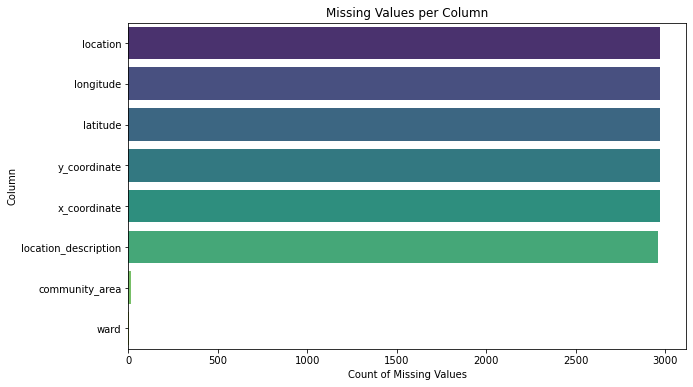

In [8]:
missing = df.isnull().sum().sort_values(ascending=False)
missing = missing[missing > 0]
plt.figure(figsize=(10, 6))
sns.barplot(x=missing.values, y=missing.index, palette='viridis')
plt.title("Missing Values per Column")
plt.xlabel("Count of Missing Values")
plt.ylabel("Column")
plt.show()

In [9]:
unique_counts = df.nunique().sort_values(ascending=True)
unique_counts_df = unique_counts.reset_index()
unique_counts_df.columns = ['Column', 'Unique Values']
print(unique_counts_df)

                  Column  Unique Values
0                 arrest              2
1               domestic              2
2                   year              3
3               district             23
4               fbi_code             26
5           primary_type             31
6                   ward             50
7         community_area             77
8   location_description            142
9                   beat            275
10           description            333
11                  iucr            355
12            updated_on           1550
13             longitude          33039
14                 block          33779
15          x_coordinate          61226
16              latitude          75948
17          y_coordinate          95420
18              location         227265
19                  date         320995
20           case_number         650519
21                    id         650588


In [10]:
df["year"].unique()

array([2023, 2024, 2025], dtype=int64)

In [28]:
def unique_value_counts(column):
    counts = df[column].value_counts()
    for val, cnt in counts.items():
        print(f"{val}: {cnt}")

# Removing Duplicates

In [11]:
df.shape

(650588, 22)

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.shape

(650588, 22)

# Handling Null Values

In [14]:
df.isnull().sum()

id                         0
case_number                0
date                       0
block                      0
iucr                       0
primary_type               0
description                0
location_description    2959
arrest                     0
domestic                   0
beat                       0
district                   0
ward                       3
community_area            17
fbi_code                   0
x_coordinate            2971
y_coordinate            2971
year                       0
updated_on                 0
latitude                2971
longitude               2971
location                2971
dtype: int64

In [15]:
df["ward"].unique()

<IntegerArray>
[   8,   17,   42,   21,   25,   48,   27,   44,    9,   20,   37,   32,   28,
   18,   19,   39,   46,    1,   16,    3,   24,   30,    7,   14,   40,   22,
   49,   35,   26,   15,   23,   45,    4,   11,   34,    5,   50,   13,    2,
   29,    6,   10,   38,   43,   36,   12,   33,   31,   41,   47, <NA>]
Length: 51, dtype: Int64

In [16]:
mode_ward = df['ward'].mode().iloc[0]
df['ward'].fillna(mode_ward, inplace=True)

In [17]:
df["community_area"].unique()

<IntegerArray>
[  46,   68,    8,   75,   30,   77,   28,    6,   49,   42,   23,   24,   70,
   74,   43,   71,   27,   16,   66,    3,   35,   29,   19,   25,    4,   56,
    1,   20,   44,   72,   31,    7,   32,   67,   15,   11,   38,   33,   61,
   53,   54,    2,   69,   63,   51,   45,   73,   22,   41,   26,   65,   47,
   13,   40,    5,   64,   60,   14,   58,   34,   12,   48,   17,   36,   55,
   39,   10,   37,   18,   62,   21,   50,   52,    9,   59,   76,   57, <NA>]
Length: 78, dtype: Int64

In [18]:
mode_community_area = df['community_area'].mode().iloc[0]
df['community_area'].fillna(mode_community_area, inplace=True)

In [31]:
df.isnull().sum()

id                         0
case_number                0
date                       0
block                      0
iucr                       0
primary_type               0
description                0
location_description    2959
arrest                     0
domestic                   0
beat                       0
district                   0
ward                       0
community_area             0
fbi_code                   0
x_coordinate            2971
y_coordinate            2971
year                       0
updated_on                 0
latitude                2971
longitude               2971
location                2971
danger_level               0
hour                       0
day_period                 0
dtype: int64

In [21]:
def classify_danger(row):
    high = ['HOMICIDE', 'CRIMINAL SEXUAL ASSAULT', 'ROBBERY', 'BATTERY', 'OFFENSE INVOLVING CHILDREN', 'ASSAULT', 'ARSON', 'WEAPONS VIOLATION']
    medium = ['BURGLARY', 'DECEPTIVE PRACTICE', 'MOTOR VEHICLE THEFT', 'INTIMIDATION', 'STALKING', 'THEFT']
    low = ['NARCOTICS', 'CRIMINAL DAMAGE', 'PUBLIC PEACE VIOLATION', 'GAMBLING', 'LIQUOR LAW VIOLATION', 'OBSCENITY', 'OTHER OFFENSE']
    
    if row in high:
        return 'High'
    elif row in medium:
        return 'Medium'
    elif row in low:
        return 'Low'
    else:
        return 'Unknown'

df['danger_level'] = df['primary_type'].apply(classify_danger)

In [35]:
unique_value_counts("danger_level")

Medium: 271654
High: 226000
Low: 133721
Unknown: 19213


In [ ]:
df['hour'] = df['date'].dt.hour

def get_day_period(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['day_period'] = df['hour'].apply(get_day_period)

In [36]:
unique_value_counts("hour")

0: 45474
12: 37059
15: 35531
17: 35063
16: 34853
18: 34604
19: 33636
20: 32415
14: 30941
21: 29895
13: 29259
22: 28590
11: 28439
10: 27685
9: 26813
23: 26183
8: 22237
1: 21689
2: 19227
3: 16571
7: 16363
4: 13566
6: 12523
5: 11972


In [37]:
unique_value_counts("day_period")

Night: 201195
Afternoon: 167643
Morning: 146032
Evening: 135718


In [38]:
df['is_weekend'] = df['date'].dt.dayofweek >= 5

In [39]:
unique_value_counts("is_weekend")

False: 462243
True: 188345


In [40]:
indoor = ['RESIDENCE', 'APARTMENT', 'HOSPITAL BUILDING', 'SCHOOL', 'GOVERNMENT BUILDING']
df['location_type'] = df['location_description'].apply(lambda x: 'Indoor' if x in indoor else 'Outdoor')

In [41]:
unique_value_counts("location_type")

Outdoor: 445071
Indoor: 202558


In [42]:
def get_season(month):
    if month in [12, 1, 2]: return 'Winter'
    elif month in [3, 4, 5]: return 'Spring'
    elif month in [6, 7, 8]: return 'Summer'
    else: return 'Autumn'

df['season'] = df['date'].dt.month.apply(get_season)

In [43]:
unique_value_counts("season")

Spring: 187413
Summer: 177345
Winter: 154351
Autumn: 131479


In [44]:
df['is_gun_related'] = df['description'].str.contains('GUN|FIREARM|WEAPON', case=False, na=False)

In [45]:
unique_value_counts("is_gun_related")

False: 583998
True: 66590


In [46]:
df['crime_frequency_at_location'] = df.groupby('location_description')['location_description'].transform('count')

In [48]:
public_keywords = ['STREET', 'PARKING', 'SIDEWALK', 'PARK', 'GAS', 'CTA', 'SCHOOL']
df['is_public_place'] = df['location_description'].str.contains('|'.join(public_keywords), case=False, na=False)

In [49]:
unique_value_counts("is_public_place")

False: 376210
True: 274378


In [53]:
df['date'] = pd.to_datetime(df['date'])
df['month_day'] = df['date'].dt.strftime('%m-%d')
special_day_labels = {
    '01-01': "New Year's Day",
    '02-14': "Valentine's Day",
    '03-17': "St. Patrick's Day",
    '07-04': "Independence Day",
    '10-31': "Halloween",
    '11-23': "Thanksgiving",
    '12-24': "Christmas Eve",
    '12-25': "Christmas Day",
    '12-31': "New Year's Eve"
}
df['special_day'] = df['month_day'].map(special_day_labels).fillna('Regular Day')
df.drop(columns='month_day', inplace=True)

In [55]:
unique_value_counts("special_day")

Regular Day: 635216
New Year's Day: 2887
Independence Day: 2381
St. Patrick's Day: 1969
Valentine's Day: 1937
Halloween: 1478
New Year's Eve: 1263
Christmas Eve: 1213
Thanksgiving: 1205
Christmas Day: 1039


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 650588 entries, 0 to 650587
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   id                           650588 non-null  int64         
 1   case_number                  650588 non-null  object        
 2   date                         650588 non-null  datetime64[ns]
 3   block                        650588 non-null  object        
 4   iucr                         650588 non-null  category      
 5   primary_type                 650588 non-null  category      
 6   description                  650588 non-null  category      
 7   location_description         647629 non-null  category      
 8   arrest                       650588 non-null  bool          
 9   domestic                     650588 non-null  bool          
 10  beat                         650588 non-null  int64         
 11  district                  

In [56]:
df.to_csv('chicago_crime_data_cleaned.csv', index=False)